# Comparing the Sources: AllSides and Media Bias/Fact Check 
------------

#### Page is divided as follows:
**1. [AllSides Data](#1.-AllSides-Data)**

**2. [MBFC Data](#2.-Media-Bias-/-Fact-Check-Data)**

**3. [Comparing AllSides vs. Media Bias/Fact Check](#3.-Comparing-the-Merged-Dataset:-AllSides-vs-MBFC-Political-Bias-Ratings)**


**Note: run the [imports and functions](#Imports-and-Functions) at the bottom of the page before running rest of the code**

# 1. AllSides Data
-----------
#### This section is divided into the following segments:
1. [Loading Data](#1.1-Load-Data)
2. [Breakdown of Bias Ratings - First Look](#1.2-Breakdown-of-Bias-Ratings---First-Look)
3. [Breakdown of Political Bias Ratings](#1.3-Breakdown-of-Political-Bias-Ratings)
4. [Which News Sources Have the Most and Least Agreement?](#1.4-Which-News-Sources-Have-the-Most-and-Least-Agreement)


#### Data was scraped from AllSides [Media Ratings Page](https://www.allsides.com/media-bias/media-bias-ratings#ratings). 

#### Referring to the image below:
* #### AllSides has their ratings divided broadly by media type - "News Media", "Think Tank/Policy Group" and "Authors". I collected info for all three (check the data folder), but only analyzed "News Media" bias ratings below. since the "Think Tank / Policy Group" and "Reference" sources were a) limited and b) beyond the scope of this paper. 
* #### "Not Rated" sites were collected seprately (check the subfolder) for completeness but ultimately not used here because the majority of them have no information (no links to the news site, no other information, no rating). They are user submitted and yet to be evaluated.

<img src="images/AllSides_DataCollected.png" alt="Drawing" style="width: 600px;"/>

## 1.1 Load Data

In [4]:
# load data
df_allsides_raw = pd.read_csv(ALLSIDES_DATA)
print(df_allsides_raw.shape)
df_allsides_raw.head()

(333, 7)


,name,url_as,bias_as,agree_as,disagree_as,agree_ratio_as,agree_desc_as
0,ABC News,https://www.allsides.com/news-source/abc-news-...,left-center,17523,11118,1.576093,agree
1,Above The Law,https://www.allsides.com/news-source/above-law...,left-center,8,5,1.600000,agree
2,Abridge News,https://www.allsides.com/news-source/abridge-n...,allsides,159,98,1.622449,agree
3,AJ+,https://www.allsides.com/news-source/aj-media-...,left,169,75,2.253333,strongly agree
4,Al Jazeera,https://www.allsides.com/news-source/al-jazeer...,left-center,3986,6440,0.618944,disagree


#### General note: please ignore the "agree_ratio_as" column wherever you see it- there is an error. 

In [5]:
num_sources_as = df_allsides_raw.shape[0]
print("There are {} rated sources in AllSides".format(num_sources_as))

There are 333 rated sources in AllSides


#### a) Cursory check for duplicates: 

In [6]:
df_allsides_raw[df_allsides_raw.duplicated(subset='name', keep=False)]

,name,url_as,bias_as,agree_as,disagree_as,agree_ratio_as,agree_desc_as
185,PJ Media,https://www.allsides.com/news-source/pj-media,right,256,140,1.828571,agree
186,PJ Media,https://www.allsides.com/news-source/pj-media-...,right-center,194,169,1.147929,somewhat agree


Looking at the links on AllSides websites suggests that these are the same?? Can't spot the difference. 


#### b) AllSides also has different ratings for "news" and "editorial" pages:

In [7]:
df_allsides_raw[df_allsides_raw['name'].str.contains("New York Times") | df_allsides_raw['name'].str.contains("Fox")]

,name,url_as,bias_as,agree_as,disagree_as,agree_ratio_as,agree_desc_as
96,Fox News Latino,https://www.allsides.com/news-source/fox-news-...,right,1845,953,1.935992,agree
97,Fox News Opinion,https://www.allsides.com/news-source/fox-news-...,right,10233,2419,4.230260,absolutely agree
98,Fox Online News,https://www.allsides.com/news-source/fox-news-...,right-center,25988,34798,0.746825,somewhat disagree
166,New York Times - News,https://www.allsides.com/news-source/new-york-...,left-center,18068,27607,0.654472,disagree
167,New York Times - Opinion,https://www.allsides.com/news-source/new-york-...,left,4599,1452,3.167355,absolutely agree


#### c) AllSides also seems to has 3 "major media sources" - these are not actual news sources, not sure why they are on their list:

In [8]:
df_allsides_raw[df_allsides_raw['name'].str.contains("Major Media")]

,name,url_as,bias_as,agree_as,disagree_as,agree_ratio_as,agree_desc_as
40,Center - Major Media Sources,https://www.allsides.com/news-source/center-ma...,center,621,540,1.150000,somewhat agree
136,Left - Major Media Sources,https://www.allsides.com/news-source/left-majo...,left,562,439,1.280182,somewhat agree
209,Right - Major Media Sources,https://www.allsides.com/news-source/right-maj...,right,293,287,1.020906,somewhat agree


#### d) AllSides also has a mix of different news sources:

In [9]:
is_it_news = ["CU Independent", "Indiana Daily Student", "Live Action News", "Google News", "Suspend Belief Podcast"]
df_allsides_raw[df_allsides_raw['name'].isin(is_it_news)]


,name,url_as,bias_as,agree_as,disagree_as,agree_ratio_as,agree_desc_as
63,CU Independent,https://www.allsides.com/news-source/cu-indepe...,center,346,410,0.843902,somewhat disagree
101,Google News,https://www.allsides.com/news-source/google-ne...,left-center,311,230,1.352174,somewhat agree
117,Indiana Daily Student,https://www.allsides.com/news-source/indiana-d...,center,272,353,0.770538,somewhat disagree
139,Live Action News,https://www.allsides.com/news-source/live-acti...,right-center,280,186,1.505376,agree
232,Suspend Belief Podcast,https://www.allsides.com/news-source/suspend-b...,allsides,148,176,0.840909,somewhat disagree


* CU Independent and Indiana Daily Student are student newspapers. Google News is an aggregator (not publisher). "Live Action News" is an American anti-abortion organization founded in 2003 ... is known for its undercover videos taken at Planned Parenthood clinics." - doesnt seem to be what we are going for (i.e., original reporting on different topics)?

* Although many of these sources didn't end up in the comparison vs. MB/FC (there was no match), we will need to look @ this closely to see what constitues as "news reporting" for our paper

## 1.2 Breakdown of Bias Ratings - First Look

#### Lets look at the breakdown of the "bias" category:

In [10]:
print_stats(df_allsides_raw['bias_as'])

Total Sources: 333

Category Count: 
center          112
left-center      77
left             51
right            46
right-center     36
allsides         11
Name: bias_as, dtype: int64 

Category Percentage Breakdown: 
center          33.633634
left-center     23.123123
left            15.315315
right           13.813814
right-center    10.810811
allsides         3.303303
Name: bias_as, dtype: float64


#### What is the "allsides" category? Taking a closer look: 

In [11]:
df_allsides_raw[df_allsides_raw['bias_as'] == 'allsides']

,name,url_as,bias_as,agree_as,disagree_as,agree_ratio_as,agree_desc_as
2,Abridge News,https://www.allsides.com/news-source/abridge-n...,allsides,159,98,1.622449,agree
5,AllSides,https://www.allsides.com/news-source/allsides-0,allsides,3534,1423,2.483486,strongly agree
6,AllSides Community,https://www.allsides.com/news-source/allsides-...,allsides,2287,1373,1.665696,agree
22,Better Angels,https://www.allsides.com/news-source/better-an...,allsides,62,55,1.127273,somewhat agree
61,Counterpointing,https://www.allsides.com/news-source/counterpo...,allsides,371,348,1.066092,somewhat agree
138,Listen First Project,https://www.allsides.com/news-source/listen-fi...,allsides,132,105,1.257143,somewhat agree
152,Mismatch.org,https://www.allsides.com/news-source/mismatcho...,allsides,86,92,0.934783,somewhat disagree
230,StoryCorps,https://www.allsides.com/news-source/storycorp...,allsides,64,57,1.122807,somewhat agree
232,Suspend Belief Podcast,https://www.allsides.com/news-source/suspend-b...,allsides,148,176,0.840909,somewhat disagree
258,The Flip Side,https://www.allsides.com/news-source/flip-side...,allsides,306,241,1.269710,somewhat agree


#### allsides = mixed news sources, news aggregators

From AllSides: "When does AllSides give a source a "Mixed" media bias rating?
If the source has a system for aggregating content that is open and transparently designed to show multiple perspectives and the content comes from sources that are left, center and right, we assign a Mixed bias rating."
https://www.allsides.com/media-bias/allsides

#### Lets drop the "allsides" category

In [12]:
df_allsides = df_allsides_raw[(df_allsides_raw['bias_as'] != 'allsides')].reset_index(drop=True)
df_allsides.shape

(322, 7)

## 1.3 Breakdown of Political Bias Ratings

#### Lets look at the breakdown of ONLY the political leanings we are interested in:

In [13]:
print_stats(df_allsides['bias_as'])

Total Sources: 322

Category Count: 
center          112
left-center      77
left             51
right            46
right-center     36
Name: bias_as, dtype: int64 

Category Percentage Breakdown: 
center          34.782609
left-center     23.913043
left            15.838509
right           14.285714
right-center    11.180124
Name: bias_as, dtype: float64


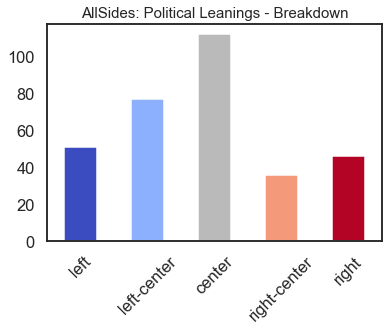

In [14]:
df_allsides['bias_as'].value_counts().reindex(BIAS_LIST).plot(kind='bar', color=color_RdBu, rot=45);
plt.title("AllSides: Political Leanings - Breakdown", fontsize=15)
plt.savefig(os.path.join(RESULTS_DIR, 'allsides_breakdown.png'), dpi=300, bbox_inches = "tight")

#### Overall it seems center focused, with a slightly higher number of left media sources than right. IMO this is seems normal - I think the news media generally skews "left", i.e. lot more left leaning sources with fewer but more "vocal" right sources - should try to find a source for this to help justify our dataset.

## 1.4 Which News Sources Have the Most and Least Agreement

**Determined by public ratings - Users can indicate whether or not they agree with AllSides ratings, which allsites then uses to classify news sources as follows: **

<img src="images/agreement.png" alt="Drawing" style="width: 300px;"/>

#### a) Breakdown of agreement

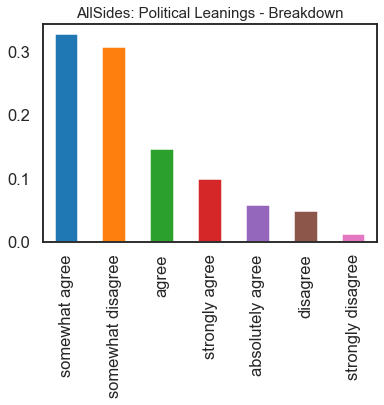

In [15]:
df_allsides['agree_desc_as'].value_counts(normalize=True).plot(kind='bar', color=colors, rot=90);
plt.title("AllSides: Political Leanings - Breakdown", fontsize=15)
plt.savefig(os.path.join(RESULTS_DIR, 'allsides_agreement_breakdown.png'), dpi=300, bbox_inches = "tight")

#### b) Which news sources have most disagreement? 

Showing a list of 15

In [16]:
col_list = ['name','url_as','bias_as','agree_as','disagree_as', 'agree_desc_as']
df_allsides.loc[df_allsides.sort_values(by=['agree_ratio_as'], ascending=True)[:15].index, col_list]

,name,url_as,bias_as,agree_as,disagree_as,agree_desc_as
46,CNBC,https://www.allsides.com/news-source/cnbc,center,1810,4403,strongly disagree
299,Virginia Mercury,https://www.allsides.com/news-source/virginia-...,center,8,18,strongly disagree
271,The Republican,https://www.allsides.com/news-source/republican,center,191,426,strongly disagree
217,Snopes,https://www.allsides.com/news-source/snopes,center,281,582,strongly disagree
246,The Economist,https://www.allsides.com/news-source/economist,left-center,2254,4304,disagree
137,MarketWatch,https://www.allsides.com/news-source/marketwat...,right-center,143,264,disagree
42,Chicago Tribune,https://www.allsides.com/news-source/chicago-t...,center,1878,3353,disagree
51,Columbia Journalism Review,https://www.allsides.com/news-source/columbia-...,center,167,298,disagree
264,The Observer (New York),https://www.allsides.com/news-source/observer,center,210,370,disagree
237,The Courier-Journal,https://www.allsides.com/news-source/courier-j...,left-center,137,233,disagree


#### c) Which news sources have most agreement? 

Showing 15 (not a complete list)

In [17]:
df_allsides.loc[df_allsides.sort_values(by=['agree_ratio_as'], ascending=False)[:15].index, col_list]

,name,url_as,bias_as,agree_as,disagree_as,agree_desc_as
40,Chicago Defender,https://www.allsides.com/news-source/chicago-d...,left,2,0,absolutely agree
166,Newtrals,https://www.allsides.com/news-source/newtrals-...,center,2,0,absolutely agree
189,Psychology Today,https://www.allsides.com/news-source/psycholog...,center,10,1,absolutely agree
147,Mother Jones,https://www.allsides.com/news-source/mother-jo...,left,7464,1340,absolutely agree
4,AlterNet,https://www.allsides.com/news-source/alternet-...,left,5137,1191,absolutely agree
115,InfoWars,https://www.allsides.com/news-source/infowars,right,4332,1012,absolutely agree
92,Fox News Opinion,https://www.allsides.com/news-source/fox-news-...,right,10233,2419,absolutely agree
121,Jacobin,https://www.allsides.com/news-source/jacobin-m...,left,594,150,absolutely agree
49,CNN - Editorial,https://www.allsides.com/news-source/cnn-edito...,left,12311,3335,absolutely agree
206,RollingStone.com,https://www.allsides.com/news-source/rolling-s...,left,1496,434,absolutely agree


------------------



# 2. Media Bias / Fact Check Data
------------------

#### This section is divided into the following segments:
1. [Loading Data](#2.1-Load-Data)
2. [Breakdown of "Reporting Type"](#2.2-Breakdown-of-"Reporting-Type")
3. [Breakdown of Bias Ratings - First Look](#2.3-Breakdown-of-Bias-Ratings---First-Look)
4. [Breakdown of Political Bias Ratings](#2.4-Breakdown-of-Political-Bias-Ratings)
5. [Country Related Analysis](#2.5-Country-Related-Analysis)
6. [AllSides vs. MBFC: Comparing Ratio of Political Leanings (Raw)](#2.6-AllSides-vs.-MBFC:-Comparing-Ratio-of-Political-Leanings---Raw)


* #### While MBFC supposedly rates bias on a [0-10 scale](https://mediabiasfactcheck.com/methodology/), this data does <font color=red>NOT</font> seem to be available on their site. They have an image for many sources, but it's not possible to discern the number rating from the image (visually difficult and image names are also not consistent so can't scrape those). 
* #### They  list the "aggregate" view such as "Right" or "Right-Center". They also give each source a “Factual Reporting” rating. See an example of CNN below:

<img src="images/MBFC_2.png" alt="Drawing" style="width: 650px;"/>

* #### MBFC also lacks a clean / consistent interface for systematically looking at their data. As such, the data was scraped using their [filtered search](https://mediabiasfactcheck.com/filtered-search/) option. There is a note on their site - "Note: this is a work in progress, what you see displayed here may be slightly different than the actual review. 99% should be accurate as we work through this process of syncing them."

<img src="images/MBFC_1.png" alt="Drawing" style="width: 700px;"/>

* #### MBFC does not distinguish between types of Media Sources (unlike AllSides), but it does provide a "factual reporting" rating.

## 2.1 Load Data

In [18]:
df_mbfc_raw = pd.read_csv(MBFC_DATA)
df_mbfc_raw.shape

(3058, 6)

In [19]:
df_mbfc_raw.head()

,name,news_link,bias_mbfc,reporting_mbfc,country_mbfc,references_mbfc
0,100% Fed up,https://mediabiasfactcheck.com/100-percent-fed...,Questionable Sources,Low,United States,"97,906"
1,10News.one,https://mediabiasfactcheck.com/10news-one/,Questionable Sources,Low,United States,"2,011"
2,24 News,https://mediabiasfactcheck.com/24-news/,Questionable Sources,Low,United States,527
3,247 News Media,https://mediabiasfactcheck.com/247-news-media/,Questionable Sources,Very Low,Macedonia,213
4,2nd Amendment Daily News,https://mediabiasfactcheck.com/2nd-amendment-d...,Questionable Sources,Low,United States,0


#### They have country data available (comapred to AllSides which doesn't). I couldn't find an official defintion of what the "references" mean. 

#### Note: ended up with a bunch of duplicates because of the filtered-search option. Need to get rid of them.

In [20]:
df_mbfc_raw[df_mbfc_raw.duplicated(subset=None, keep='first')].head()

,name,news_link,bias_mbfc,reporting_mbfc,country_mbfc,references_mbfc
520,100% Fed up,https://mediabiasfactcheck.com/100-percent-fed...,Questionable Sources,Low,United States,"97,906"
521,10News.one,https://mediabiasfactcheck.com/10news-one/,Questionable Sources,Low,United States,"2,011"
522,24 News,https://mediabiasfactcheck.com/24-news/,Questionable Sources,Low,United States,527
523,2nd Amendment Daily News,https://mediabiasfactcheck.com/2nd-amendment-d...,Questionable Sources,Low,United States,0
524,3CCorp.net,https://mediabiasfactcheck.com/3ccorp-net/,Questionable Sources,Low,United States,0


In [21]:
df_mbfc_raw = df_mbfc_raw.drop_duplicates()
df_mbfc_raw.shape

(2631, 6)

In [22]:
num_sources_mbfc = df_mbfc_raw.shape[0]
print("There are {} rated sources in AllSides".format(num_sources_mbfc))

There are 2631 rated sources in AllSides


## 2.2 Breakdown of "Reporting Type"

####  Lets take a look at the breakdown of the "factual reporting" category:

In [23]:
print_stats(df_mbfc_raw['reporting_mbfc'])

Total Sources: 2631

Category Count: 
High              1203
Mixed              609
Low                491
Very High          133
Mostly Factual     102
Very Low            92
Name: reporting_mbfc, dtype: int64 

Category Percentage Breakdown: 
High              45.741445
Mixed             23.155894
Low               18.669202
Very High          5.057034
Mostly Factual     3.878327
Very Low           3.498099
Name: reporting_mbfc, dtype: float64


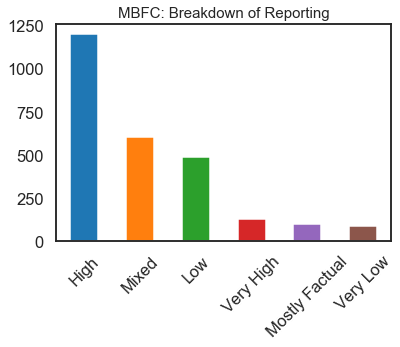

In [24]:
df_mbfc_raw['reporting_mbfc'].value_counts().plot(kind='bar', color=colors, rot=45);
plt.title("MBFC: Breakdown of Reporting", fontsize=15)
plt.savefig(os.path.join(RESULTS_DIR, 'mbfc_breakdown_reporting_raw.png'), dpi=300, bbox_inches = "tight")

## 2.3 Breakdown of Bias Ratings - First Look

#### Lets look at the breakdown of the "bias" category:

In [25]:
print_stats(df_mbfc_raw['bias_mbfc'])

Total Sources: 2631

Category Count: 
Questionable Sources        509
Left-Center                 496
Least Biased                391
Left                        321
Conspiracy-Pseudoscience    286
Right                       269
Right-Center                228
Pro-Science                 131
Name: bias_mbfc, dtype: int64 

Category Percentage Breakdown: 
Questionable Sources        19.346256
Left-Center                 18.852147
Least Biased                14.861269
Left                        12.200684
Conspiracy-Pseudoscience    10.870391
Right                       10.224249
Right-Center                 8.665906
Pro-Science                  4.979095
Name: bias_mbfc, dtype: float64


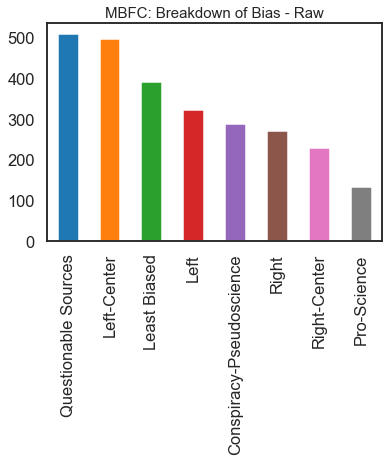

In [26]:
df_mbfc_raw['bias_mbfc'].value_counts().plot(kind='bar', color=colors);
plt.title("MBFC: Breakdown of Bias - Raw", fontsize=15)
# plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig(os.path.join(RESULTS_DIR, 'mbfc_breakdown_bias_raw.png'), dpi=300, bbox_inches = "tight")

#### MBFC appears to have a number of "bias" categories in addition to the standard political leanings, and questionable sources seems to be quite popular. Note: Least Biased = Center



#### Lets drop the "Conspiracy-Pseudoscience " , "Pro-Science" and "Questionable Sources" biases and analyse further. 


In [27]:
not_political_bias = ['Questionable Sources', 'Conspiracy-Pseudoscience', 'Pro-Science']
df_mbfc = df_mbfc_raw[~df_mbfc_raw.bias_mbfc.isin(not_political_bias)].reset_index(drop=True)

## 2.4 Breakdown of Political Bias Ratings

#### Lets look at the breakdown of the ONLY the political leanings we are interested in:

In [28]:
print_stats(df_mbfc['bias_mbfc'])

Total Sources: 1705

Category Count: 
Left-Center     496
Least Biased    391
Left            321
Right           269
Right-Center    228
Name: bias_mbfc, dtype: int64 

Category Percentage Breakdown: 
Left-Center     29.090909
Least Biased    22.932551
Left            18.826979
Right           15.777126
Right-Center    13.372434
Name: bias_mbfc, dtype: float64


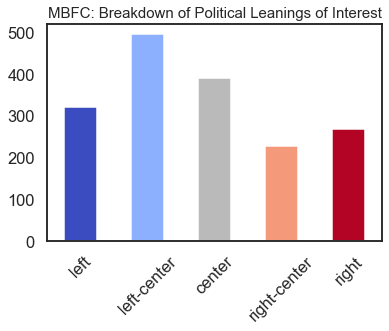

In [29]:
blist_mfbc = ['Left', 'Left-Center', 'Least Biased', 'Right-Center', 'Right']
df_mbfc['bias_mbfc'] = df_mbfc['bias_mbfc'].replace(dict(zip(blist_mfbc, BIAS_LIST)))
df_mbfc['bias_mbfc'].value_counts().reindex(BIAS_LIST).plot(kind='bar', color=color_RdBu, rot=45);
plt.title("MBFC: Breakdown of Political Leanings of Interest", fontsize=15)
plt.savefig(os.path.join(RESULTS_DIR, 'mbfc_breakdown_political_allcountries.png'), dpi=300, bbox_inches = "tight")

#### This is somewhat different compared to allsides - much more left-center than center. But note this dataset contains news sources from many different countries. Lets look at that further.

## 2.5 Country-Related Analysis

#### Lets look at the top-10 breakdown of the countries

In [30]:
print_stats(df_mbfc['country_mbfc'], topk = 10)

Total Sources: 1705

Category Count: 
United States                1207
United Kingdom                 69
Canada                         49
Australia                      20
India                          18
Israel                         13
Netherlands                     8
Unknown or Invalid Region       8
South Africa                    7
Japan                           6
Name: country_mbfc, dtype: int64 

Category Percentage Breakdown: 
United States                79.986746
United Kingdom                4.572565
Canada                        3.247184
Australia                     1.325381
India                         1.192843
Israel                        0.861498
Netherlands                   0.530152
Unknown or Invalid Region     0.530152
South Africa                  0.463883
Japan                         0.397614
Name: country_mbfc, dtype: float64


### Now lets look at the breakdown of bias in US-only sources: 

In [31]:
df_mbfc_US = df_mbfc[df_mbfc['country_mbfc'] == 'United States'].reset_index(drop=True)
df_mbfc_US.shape

(1207, 6)

In [32]:
df_mbfc_US.head()

,name,news_link,bias_mbfc,reporting_mbfc,country_mbfc,references_mbfc
0,Greenville Gazette,https://mediabiasfactcheck.com/greenville-gaze...,left,Low,United States,"9,908"
1,2ndVote,https://mediabiasfactcheck.com/2ndvote/,right,Mixed,United States,708
2,Accuracy in Academia (AIA),https://mediabiasfactcheck.com/accuracy-in-aca...,right,Mixed,United States,"183,973"
3,Accuracy in Media,https://mediabiasfactcheck.com/accuracy-in-med...,right,Mixed,United States,"521,556"
4,Acting Man,https://mediabiasfactcheck.com/acting-man/,right,Mixed,United States,"362,398"


#### Lets look at the breakdown of political leanings only in the US:

In [33]:
print_stats(df_mbfc_US['bias_mbfc'])

Total Sources: 1207

Category Count: 
left-center     355
center          266
left            236
right           204
right-center    146
Name: bias_mbfc, dtype: int64 

Category Percentage Breakdown: 
left-center     29.411765
center          22.038111
left            19.552610
right           16.901408
right-center    12.096106
Name: bias_mbfc, dtype: float64


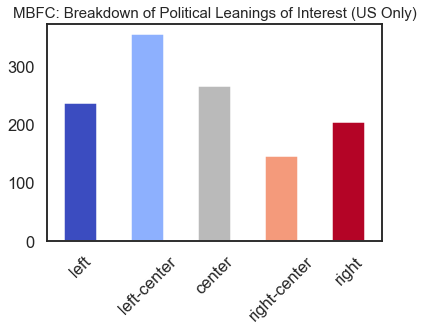

In [34]:
df_mbfc_US['bias_mbfc'].value_counts().reindex(BIAS_LIST).plot(kind='bar', color=color_RdBu, rot=45);
plt.title("MBFC: Breakdown of Political Leanings of Interest (US Only)", fontsize=15)
plt.savefig(os.path.join(RESULTS_DIR, 'mbfc_breakdown_political_us.png'), dpi=300, bbox_inches = "tight")

#### Not much difference in the breakdown of U.S. only vs. All Countries

## 2.6 AllSides vs. MBFC: Comparing Ratio of Political Leanings - Raw

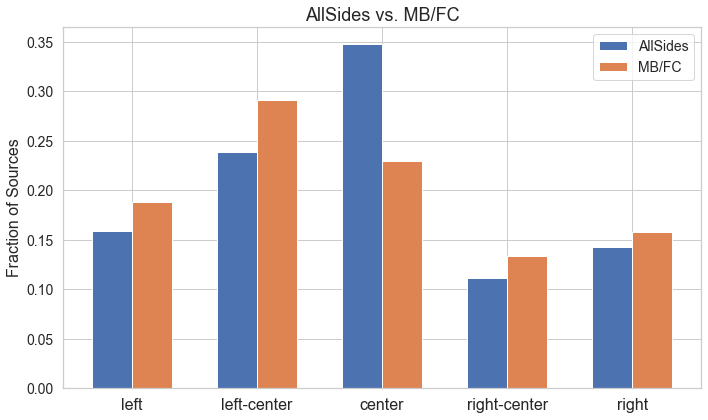

<Figure size 432x288 with 0 Axes>

In [35]:
sns.set(style="whitegrid")
labels = BIAS_LIST
as_means = list(df_allsides['bias_as'].value_counts(normalize=True).reindex(BIAS_LIST))
mbfc_means = list(df_mbfc['bias_mbfc'].value_counts(normalize=True).reindex(BIAS_LIST))

x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, as_means, width, label='AllSides')
rects2 = ax.bar(x + width/2, mbfc_means, width, label='MB/FC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fraction of Sources', fontsize=16)
ax.set_title('AllSides vs. MB/FC',  fontsize=18)
ax.set_xticks(x)
ax.tick_params(axis="y", labelsize=14)
ax.set_xticklabels(labels,  fontsize=16)
ax.legend(fontsize=14)


fig.tight_layout()
plt.show()
plt.savefig(os.path.join(RESULTS_DIR, 'allsides_vs_mbfc_raw.png'), dpi=300, bbox_inches = "tight")

----------------------

# 3. Comparing the Merged Dataset: AllSides vs MBFC Political Bias Ratings
-----

### This section is divided into the following segments:
1. [Merged Data Stats & Preprocessing](#3.1-Merged-Data-Stats-&-Preprocessing)
2. [Compare Ratings](#3.2-Compare-Ratings)

### How the Data Was Merged:
** In order to compare the the political bias ratings we need to merge the dataset (find which news sources exist in both).** 
** The dataset was merged by name: **
1.  Directly (merge where names are the same)
2.  Fuzzy name (using fuzzywuzzy w_ratio) matching followed by manual review (quick scan)
3.  Manually checking whether the remaining news sources had any matches 

** The "raw" files contain <font color=red>ALL</font> types of bias ratings (ex: "questionable sources", "conspiracy" etc) were used for the merge because AllSides has given a CLEAR political bias rating to while MB/FC hasnt for some cases. I deal with these cases individually in section 3.1 d) below**



## 3.1 Merged Data Stats & Preprocessing

### a) Loading Data

In [36]:
df_alldata = pd.read_csv(os.path.join(EXP_DIR, 'final_merged_allsides_mbfc.csv'))

In [37]:
clean_allsides = ['name_allsides','url_as','bias_as','agree_as','disagree_as','agree_ratio_as','agree_desc_as']
clean_mbfc = ['name_mbfc','news_link','bias_mbfc','reporting_mbfc','country_mbfc','references_mbfc']

df_matched = df_alldata[df_alldata['unique_id_as'].notnull() & df_alldata['unique_id_mbfc'].notnull()].reset_index(drop=True)
df_allsides_unmatched = df_alldata[df_alldata['unique_id_as'].notnull() & df_alldata['unique_id_mbfc'].isnull()].reset_index(drop=True)
df_mbfc_unmatched = df_alldata[df_alldata['unique_id_mbfc'].notnull() & df_alldata['unique_id_as'].isnull()].reset_index(drop=True)

df_allsides_unmatched = df_allsides_unmatched[clean_allsides]
df_mbfc_unmatched = df_mbfc_unmatched[clean_mbfc]

### b) Some inital stats:

In [38]:
final_match = df_matched.shape[0]
allsides_unmatched = df_allsides_unmatched.shape[0]
mbfc_unmatched = df_mbfc_unmatched.shape[0]

print("Final number of matched sources: {} \nFinal number of unmmatched AllSides sources: {} \nFinal number of unmatched MBFC Sources: {}".format(final_match, allsides_unmatched, mbfc_unmatched))
print("\nFinal number of *unmmatched* AllSides sources: {:.0%} \nFinal number of *unmatched* MBFC Sources: {:.0%}".format(allsides_unmatched/num_sources_as, mbfc_unmatched/num_sources_mbfc))

Final number of matched sources: 237 
Final number of unmmatched AllSides sources: 96 
Final number of unmatched MBFC Sources: 2417

Final number of *unmmatched* AllSides sources: 29% 
Final number of *unmatched* MBFC Sources: 92%


### c) Which sources are not present in both datasets?

A random sample of sources that didnt match:

In [39]:
print('AllSides:')
print(random.sample(df_allsides_unmatched['name_allsides'].tolist(), 50))

AllSides:
["journalist's resource", 'mit news', 'blue virginia', 'nmpolitics.net', 'socialist project/the bullet', 'the center square - michigan', 'univision', 'mtv news online', 'cu independent', 'leesburg today', 'the delaware county daily times', 'daily cardinal', 'longmont times-call', 'abridge news', 'crowdpac', 'chicago defender', 'the western journal', 'the saturday evening post', 'the cadiz record', 'jubilee media', 'center - major media sources', 'howard kurtz', 'listen first project', 'calmatters', 'record journal', 'michigan daily', 'falls church news - press', 'the advocate-messenger', 'barnstable patriot', 'bearing drift', 'allsides', 'the oracle', 'indy week', 'right - major media sources', 'wfae', 'indy online', 'the texan', 'socialist alternative', 'the canyon county zephyr', 'newtrals', 'glaad', 'sf weekly', 'progressive voices of iowa', 'google news', 'the daily show (humor)', 'the fulcrum', 'centre view', 'the imaginative conservative', 'storycorps', 'volante']


In [40]:
print('MB/FC:')
print(random.sample(df_mbfc_unmatched['name_mbfc'].tolist(), 50))

MB/FC:
['vancouver sun', 'deepstatenation', 'colorado springs gazette', 'new scientist', 'red state disaster', 'queerty', 'socialistworker', 'faith family america', 'jackson free press', 'dutch review', 'environmental working group (ewg)', 'bullshido', 'geopolitics alert', 'transpartisan review', 'political wire', 'not liberal', 'news hounds', 'progress tribune', 'health sciences institute', 'military times', 'ara news', 'the new american', 'conservative institute', 'the newly press', 'national center for transgender equality', 'discovery institute', 'oneindia', 'southern patriot news', 'thrive movement', 'eagle pac', '9 news (australia)', 'american free press', 'conservative spirit', 'media equalizer', 'fash the nation', 'the tab', 'republicans suck', 'dayton daily news', 'free wheel media', 'lady liberty news', 'american truth today', 'christian ministries international', 'earthnews-conservative news', 'reflection of mind', 'conservative politics today', 'center for american progress

### d) Dealing with differences in "bias" categories:

(Each source has some additional bias categories such as "allsides" or "questionable sources" - dealing with that discrepency below)

#### Lets address AllSides first:

In [41]:
print_stats(df_matched['bias_as'])

Total Sources: 237

Category Count: 
center          70
left-center     54
left            42
right           36
right-center    33
allsides         2
Name: bias_as, dtype: int64 

Category Percentage Breakdown: 
center          29.535865
left-center     22.784810
left            17.721519
right           15.189873
right-center    13.924051
allsides         0.843882
Name: bias_as, dtype: float64


#### Going to drop "allsides" as they are news aggregators:

In [42]:
df_matched[df_matched['bias_as'] == 'allsides']

,name_allsides,url_as,bias_as,agree_as,disagree_as,agree_ratio_as,agree_desc_as,orig_name_as,unique_id_as,news_link,bias_mbfc,reporting_mbfc,country_mbfc,references_mbfc,orig_name_mbfc,unique_id_mbfc,name_mbfc
120,the flip side,https://www.allsides.com/news-source/flip-side...,allsides,306.0,241.0,1.269710,somewhat agree,the flip side,258.0,https://mediabiasfactcheck.com/the-flip-side/,center,high,united states,0,the flip side,2292.0,the flip side
235,yahoo! the 360,https://www.allsides.com/news-source/yahoo-360...,allsides,71.0,69.0,1.028986,somewhat agree,yahoo! the 360,331.0,https://mediabiasfactcheck.com/yahoo-news/,left-center,high,united states,NaN,yahoo news,manual_8,yahoo news


#### Lets address MBFC first:

In [43]:
print_stats(df_matched['bias_mbfc'])

Total Sources: 237

Category Count: 
left-center                 72
left                        45
right-center                34
right                       33
center                      30
questionable sources        15
pro-science                  5
conspiracy-pseudoscience     3
Name: bias_mbfc, dtype: int64 

Category Percentage Breakdown: 
left-center                 30.379747
left                        18.987342
right-center                14.345992
right                       13.924051
center                      12.658228
questionable sources         6.329114
pro-science                  2.109705
conspiracy-pseudoscience     1.265823
Name: bias_mbfc, dtype: float64


In [44]:
print("Questionable sources: \n", list(df_matched['name_mbfc'][df_matched['bias_mbfc']=='questionable sources']))
print("\nPro-science: \n", list(df_matched['name_mbfc'][df_matched['bias_mbfc']=='pro-science']))
print("\nConspiracy-pseudoscience: \n", list(df_matched['name_mbfc'][df_matched['bias_mbfc']=='conspiracy-pseudoscience']))

Questionable sources: 
 ['american thinker', 'daily mail', 'drudge report', 'frontpage magazine', 'judicial watch', 'pj media', 'pj media', 'quillette', 'right side news', 'right wing news', 'the gateway pundit', 'the national pulse', 'breitbart', 'cns news', 'world net daily (wnd)']

Pro-science: 
 ['phys', 'psychology today', 'science daily', 'scientific american', 'eurekaalert']

Conspiracy-pseudoscience: 
 ['infowars', 'live action', 'christian broadcasting network (cbn)']


#### I manually checked the MB/FC pages for each of the above news sources:
1. Questionable sources are all "right" or "extreme" (mentioned as "right" or "extreme" on their respective pages) --> categorizing them as: right** 
2. Conspiracy sources: Infowars = right, Live Action News = unrated (will drop it), CBN = right-leaning
3. Pro-science sources: no rating or mention of political bias. Categorizing as least biased, aka Center

In [45]:
### Address all the concerns above as identified ###

df_compare = df_matched.copy()

# Pro-science sources: no rating or mention of political bias. Categorizing as least biased, aka Center¶
df_compare.loc[55, 'bias_mbfc'] = 'right'
df_compare.loc[214, 'bias_mbfc'] = 'right-center'
df_compare = df_compare.drop([170],axis='rows')

# questionable sources = right
df_compare.bias_mbfc[df_compare.bias_mbfc=='questionable sources'] = 'right'

# Conspiracy sources: Infowars = right, Live Action News = unrated, CBN = right-leaning
df_compare.bias_mbfc[df_compare.bias_mbfc=='pro-science'] = 'center'

# drop allsides as they are news aggregators. 
df_compare = df_compare[df_compare['bias_as'] != 'allsides'].reset_index(drop=True)

/Users/shagun/anaconda/envs/pyv36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/shagun/anaconda/envs/pyv36/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 3.2 Comparing the Ratings

### a) Compare fraction and count of political leanings in AllSides vs. MBFC

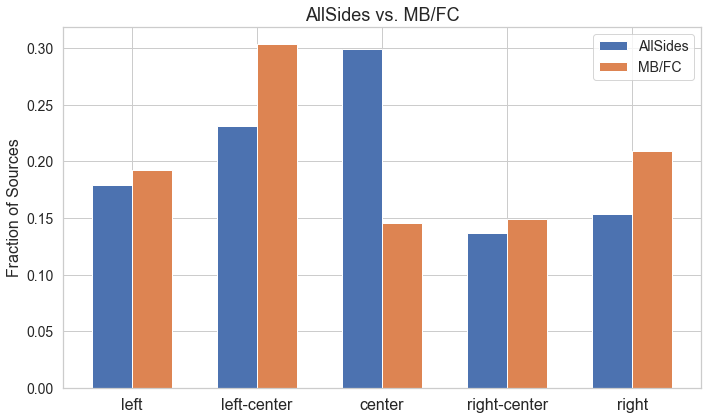

<Figure size 432x288 with 0 Axes>

In [46]:
sns.set(style="whitegrid")
labels = BIAS_LIST
as_means = list(df_compare['bias_as'].value_counts(normalize=True).reindex(BIAS_LIST))
mbfc_means = list(df_compare['bias_mbfc'].value_counts(normalize=True).reindex(BIAS_LIST))

x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, as_means, width, label='AllSides')
rects2 = ax.bar(x + width/2, mbfc_means, width, label='MB/FC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fraction of Sources', fontsize=16)
ax.set_title('AllSides vs. MB/FC',  fontsize=18)
ax.set_xticks(x)
ax.tick_params(axis="y", labelsize=14)
ax.set_xticklabels(labels,  fontsize=16)
ax.legend(fontsize=14)


fig.tight_layout()
plt.show()
plt.savefig(os.path.join(RESULTS_DIR, 'allsides_vs_mbfc_matched.png'), dpi=300, bbox_inches = "tight")

#### Updated breakdown stats after removing the additional bias categories

In [47]:
print_stats(df_compare['bias_as'])

Total Sources: 234

Category Count: 
center          70
left-center     54
left            42
right           36
right-center    32
Name: bias_as, dtype: int64 

Category Percentage Breakdown: 
center          29.914530
left-center     23.076923
left            17.948718
right           15.384615
right-center    13.675214
Name: bias_as, dtype: float64


In [48]:
print_stats(df_compare['bias_mbfc'])

Total Sources: 234

Category Count: 
left-center     71
right           49
left            45
right-center    35
center          34
Name: bias_mbfc, dtype: int64 

Category Percentage Breakdown: 
left-center     30.341880
right           20.940171
left            19.230769
right-center    14.957265
center          14.529915
Name: bias_mbfc, dtype: float64


### b) Compare the difference in ratings

In [49]:
df_compare_ratings = df_compare[['name_allsides', 'name_mbfc', 'bias_as','bias_mbfc']].copy()

### 1. Map the political leanings to numerical ratings 

Using 0 centered scale, 0 = center political bias

In [50]:
map_bias_vals = dict(zip(BIAS_LIST, list(range(-2,3))))
map_bias_vals

{'left': -2, 'left-center': -1, 'center': 0, 'right-center': 1, 'right': 2}

<img src="images/colourbar.png" alt="Drawing" style="width: 500px;"/>

In [51]:
df_compare_ratings["bias_as_enc"] = df_compare_ratings["bias_as"].map(map_bias_vals)
df_compare_ratings["bias_mbfc_enc"] = df_compare_ratings["bias_mbfc"].map(map_bias_vals)

### 2 . Mean and MAD of the two datasets:

In [52]:
as_mean = df_compare_ratings['bias_as_enc'].mean()
mbfc_mean = df_compare_ratings['bias_mbfc_enc'].mean()

as_mad = stats.median_absolute_deviation(df_compare_ratings['bias_as_enc'].values)
mbfc_mad = stats.median_absolute_deviation(df_compare_ratings['bias_mbfc_enc'].values)

print('AllSides  Mean: {} MAD: {}'.format(round(as_mean, 4), as_mad))
print('MBFC      Mean: {} MAD: {}'.format(round(mbfc_mean, 4), mbfc_mad))

AllSides  Mean: -0.1453 MAD: 1.4826
MBFC      Mean: -0.1197 MAD: 1.4826


Negative mean suggests more left leaning

### 3. Calculate the differencecs in political rating:

In [53]:
df_compare_ratings['directional_dist_shift_in_AS'] = (df_compare_ratings["bias_mbfc_enc"] - df_compare_ratings["bias_as_enc"])
df_compare_ratings['abs_distance'] = (df_compare_ratings["bias_mbfc_enc"] - df_compare_ratings["bias_as_enc"]).abs()

#### 1. Directional difference: "directional_dist_shift_in_AS"
* How much and in what direction do the AllSides rating differ when compared to MB/FC?
* -ve distance: The AS political rating moved to the left when compared to MB/FC
* +ve distance: The AS political rating moved to the right when compared to MB/FC
    
<img src="images/colourbar.png" alt="Drawing" style="width: 400px;"/>    

#### 2. Absolute difference in rating: "abs_distance"

#### Which news sources had no difference?
Displaying 15 news sources (not the whole list) 

In [54]:
df_compare_ratings.sort_values('abs_distance', ascending=True).head(15)

,name_allsides,name_mbfc,bias_as,bias_mbfc,bias_as_enc,bias_mbfc_enc,directional_dist_shift_in_AS,abs_distance
0,abc news,abc news,left-center,left-center,-1,-1,0,0
123,the independent,the independent,left-center,left-center,-1,-1,0,0
125,the libertarian republic,the libertarian republic,right-center,right-center,1,1,0,0
126,the nation,the nation,left,left,-2,-2,0,0
127,the national pulse,the national pulse,right,right,2,2,0,0
129,the resurgent,the resurgent,right,right,2,2,0,0
132,the verge,the verge,left-center,left-center,-1,-1,0,0
133,time magazine,time magazine,left-center,left-center,-1,-1,0,0
134,townhall,townhall,right,right,2,2,0,0
121,the guardian,the guardian,left-center,left-center,-1,-1,0,0


#### Which news sources had the most difference?
Displaying 15 news sources (not the whole list), sorted by absolute distance 

In [55]:
df_compare_ratings.sort_values('abs_distance', ascending=False).head(15)

,name_allsides,name_mbfc,bias_as,bias_mbfc,bias_as_enc,bias_mbfc_enc,directional_dist_shift_in_AS,abs_distance
7,arkansas democrat-gazette,arkansas democrat-gazette,left,right-center,-2,1,3,3
202,the week - news,the week,center,left,0,-2,-2,2
166,herald democrat,albany democrat-herald,left,center,-2,0,2,2
221,new hampshire union leader,manchester union leader,center,right,0,2,2,2
185,spokesman review,the spokesman-review,left-center,right-center,-1,1,2,2
117,the economist,the economist,left-center,center,-1,0,1,1
88,politifact,politifact,left-center,center,-1,0,1,1
86,politico,politico,left-center,center,-1,0,1,1
85,pj media,pj media,right-center,right,1,2,1,1
178,npr online news,npr,center,left-center,0,-1,-1,1


#### More details:

In [56]:
total_shift_dir = round(df_compare_ratings['directional_dist_shift_in_AS'].mean(), 4)
direction_move = 'left' if total_shift_dir < 0 else 'right'
total_err = df_compare_ratings['abs_distance'].mean()


print('Overall, on avg AllSides ratings when compared to MBFC moved to the {} by {}'.format(direction_move, total_shift_dir)) 
print('Overall, the average the difference in the political ratings between the two sources was: {}'.format(round(total_err, 4))) 

Overall, on avg AllSides ratings when compared to MBFC moved to the right by 0.0256
Overall, the average the difference in the political ratings between the two sources was: 0.3932


In [57]:
df_compare_ratings['directional_dist_shift_in_AS'].value_counts().sort_index()

-2      1
-1     41
 0    148
 1     40
 2      3
 3      1
Name: directional_dist_shift_in_AS, dtype: int64

#### Shift in direction of AllSides ratings when compared to MB/FC:

In [58]:
df_compare_ratings['directional_dist_shift_in_AS'].value_counts().sort_index()

-2      1
-1     41
 0    148
 1     40
 2      3
 3      1
Name: directional_dist_shift_in_AS, dtype: int64

* -ve numbers: shift to the left
* +ve numbers: shift to the right
* number value: magniude of change (0 = same rating, 1 = off by one (ex, left to left-center))

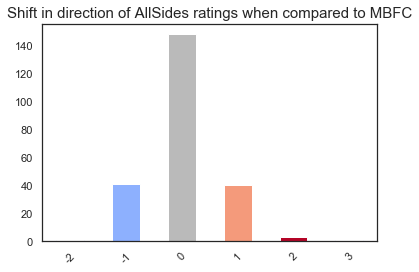

In [59]:
sns.set(style="white")
df_compare_ratings['directional_dist_shift_in_AS'].value_counts().sort_index().plot(kind='bar', color=color_RdBu, rot=45);
plt.title("Shift in direction of AllSides ratings when compared to MBFC", fontsize=15)
plt.savefig(os.path.join(RESULTS_DIR, 'allsides_vs_mbfc_direction_shift.png'), dpi=300, bbox_inches = "tight")

Most of the ratings are the same. About an equal number of ratings move to the left and to the right.

####  Breakdown of absolute difference in political ratings: AllSides vs MB/FC:

In [60]:
df_compare_ratings['abs_distance'].value_counts().sort_index()

0    148
1     81
2      4
3      1
Name: abs_distance, dtype: int64

0 = same rating, 1 = off by one (ex, left to left-center), 2 = off by two, 3 = off by three

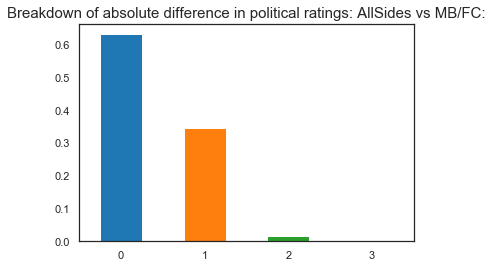

In [61]:
df_compare_ratings['abs_distance'].value_counts(normalize=True).sort_index().plot(kind='bar', color=colors, rot=0);
plt.title("Breakdown of absolute difference in political ratings: AllSides vs MB/FC:", fontsize=15)
plt.savefig(os.path.join(RESULTS_DIR, 'allsides_vs_mbfc_absolute.png'), dpi=300, bbox_inches = "tight")

Again most of the ratings are the same (~63%), ~30% change value to one leaning over and very few change more than that.

## END.

## Imports and Functions

In [1]:
import os

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

sns.set(style="white", context="talk")
%matplotlib inline

In [2]:
def print_stats(df, topk=None):
    print("Total Sources: {}\n".format(df.shape[0]))
    print("Category Count: \n{} \n".format(df.value_counts()[:topk]))
    print("Category Percentage Breakdown: \n{}".format(df.value_counts(normalize=True)[:topk] * 100))

In [3]:
DATA_DIR = 'data'
ALLSIDES_DIR = os.path.join(DATA_DIR, 'AllSides')
MBFC_DIR = os.path.join(DATA_DIR, 'MBFC')
EXP_DIR = os.path.join(DATA_DIR, '1_Comparing_AllSides_vs_MBFC')

ALLSIDES_DATA = os.path.join(ALLSIDES_DIR, 'AllSides_News.csv')
MBFC_DATA = os.path.join(MBFC_DIR, 'MBFC_data.csv')
RESULTS_DIR = os.path.join('results', '1_Comparing_AllSides_vs_MBFC')

BIAS_LIST = ['left', 'left-center', 'center', 'right-center', 'right']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
color_RdBu = ['#3b4cc0', '#8db0fe','#bababa','#f49a7b','#b40426']